# Showcase Notebook for Usage Examples

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Import Project and Cluster Methods

DEBUG:root:data_generating.Run_data_generating started main
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
DEBUG:root:data_generating.Run_data_generating finished main
DEBUG:root:model_training.Run_model_training started main
ERROR:root:Model training process failed with the following error message:
ERROR:root:[Errno 2] No such file or directory: 'data/Dec-12-2020/snippets'

Number train examples: 212
Number test examples: 0


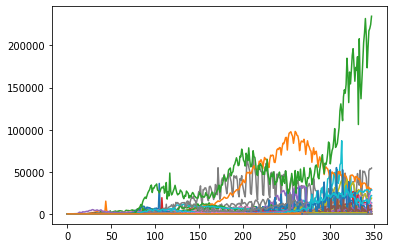

Number zero entries: 19205 Proportion: 0.31302462797255226
Total number entries: 61353
mean: 1146.6116897299235
varianz: 44851250.606439725
quantiles (10%, 20% ...): [0.0, 0.0, 0.0, 4.0, 15.0, 50.0, 153.0, 464.0, 1479.0, 234633.0]
four quantiles: [0.0, 15.0, 271.0, 234633.0]
Number of negative values: 0
Negative values: []


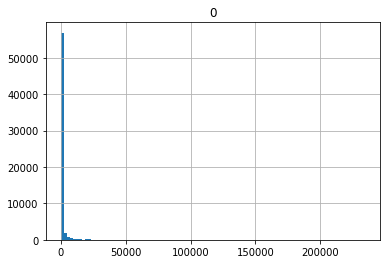

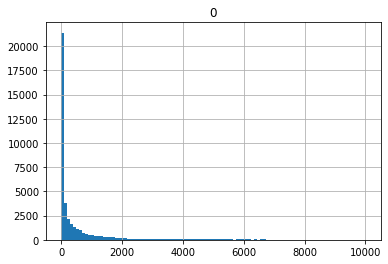

In [2]:
import data_generation_visual
import src.model_training.clusters as cl 
import pandas as pd

### Load Examples

In [3]:
import os
PROJECT_PATH = os.getcwd().replace("notebooks", "")
DATA_GEN_FOLDER_NAME = "Dec-20-2020"
DATASET_PATH = PROJECT_PATH + "data/" + DATA_GEN_FOLDER_NAME + "/"
OVERVIEW_DATASET_PATH = DATASET_PATH + "overview.csv"
overview_df = pd.read_csv(OVERVIEW_DATASET_PATH)

In [4]:
overview_df.head()

,Unnamed: 0,divide_by_country_population,do_smoothing,nr_days_for_avg,do_data_augmentation,percent_varianz,filename
0,0,no,no,3,no,0.05,0
1,1,no,no,3,no,0.01,1
2,2,no,no,3,yes,0.05,2
3,3,no,no,3,yes,0.01,3
4,4,no,no,7,no,0.05,4


In [5]:
data = []
for f in overview_df['filename']:
    data.append(data_generation_visual.load_Examples_from_file(DATASET_PATH + str(f)))

In [6]:
ts_KShape = []
n_clusters = 4
print(len(data))
for ex in data[:3]:
    ex.add_padding()
    ts_KShape.append(cl.TS_KShape(n_clusters).fit(ex))

48


In [7]:
for c in ts_KShape:
    c.statistics()

Statistic Report for: TS KShape with 4 different clusters
Expected Value: 53.0 Variance: 101.0
Biggest Cluster: 66, Smallest Cluster: 38
Statistic Report for: TS KShape with 4 different clusters
Expected Value: 53.0 Variance: 442.5
Biggest Cluster: 85, Smallest Cluster: 26
Statistic Report for: TS KShape with 4 different clusters
Expected Value: 53.0 Variance: 442.5
Biggest Cluster: 82, Smallest Cluster: 25


In [8]:
ts_KShape[0].clusters[0].make_dataframe()

,cases,countriesAndTerritories,countryterritoryCode,continentExp
0,0.0,Argentina,ARG,America
1,0.0,Argentina,ARG,America
2,0.0,Argentina,ARG,America
3,0.0,Argentina,ARG,America
4,0.0,Argentina,ARG,America
...,...,...,...,...
13219,462.0,Venezuela,VEN,America
13220,480.0,Venezuela,VEN,America
13221,468.0,Venezuela,VEN,America
13222,428.0,Venezuela,VEN,America


In [9]:
figures = ts_KShape[0].plot_geo_cluster()

In [13]:
for f in figures:
    f.show()

#### Short Test output to check wether data is OK

In [11]:
test_example = data[0].train_data[0]
print(f"Time Series shortened: \n{test_example.time_series[:100]},\n\
Time Series size: {test_example.time_series.shape[0]},\n\
Country: {test_example.country},\n\
Continent: {test_example.continent}")

Time Series shortened: 
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
  0.  3.  3.  3.  6.  5.  1.  0.  0.  2.  0. 10.  6.  2. 33.  0. 16. 15.
  8. 27. 25. 26. 43.  0. 35. 29. 38. 30.],
Time Series size: 348,
Country: Afghanistan,
Continent: Asia


### TSLearn KShape Example

In [12]:
n_clusters = 5
model = cl.TS_KShape(n_clusters).fit(examples)

model.plot_cluster().plot()

NameError: name 'examples' is not defined

### SK_extra KMedoids Example

In [ ]:
n_clusters = 2
model = cl.KMedoids(n_clusters, metric='euclidean').fit(examples)

model.plot_cluster().plot()

### DBSCAN Clustering Example

In [ ]:
model = cl.DBSCAN(2, 'euclidean').fit(examples)

model.plot_cluster().plot()